## using Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class SVM:
    def __init__(self, C=1.0, kernel='linear', tol=1e-3, max_iter=100, gamma='scale', degree=3):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.b = 0
        self.alpha = None
        self.X = None
        self.y = None
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.alpha = np.zeros(len(X))
        iterations = 0
        
        while iterations< self.max_iter:
            num_changed_alphas = 0
            for i in range(len(X)):
                E_i = self.decision_functions(X[i]) - y[i]
                
                if (y[i] * E_i < - self.tol and self.alpha[i] < self.C) or (y[i] * E_i > self.tol and self.alpha[i]>0):
                    
                    j = self.random_index(i, len(X))
                    E_j = self.decision_functions(X[j]) - y[j]
                    
                    alpha_i_old , alpha_j_old = self.alpha[i], self.alpha[j]
                    
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[j] + self.alpha[j] -  self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                        
                    if L == H:
                        continue
                    
                    eta = 1 * np.dot(X[i], X[j]) - np.dot(X[i], X[i] - np.dot(X[j], X[j]))
                    
                    if eta >= 0:
                        continue
                        
                    self.alpha[j] -= y[j] * (E_i - E_j) / eta
                    self.alpha[j] = max(L, min(self.alpha[j], H))
                    
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
                        
                    self.alpha[i] += y[i] * y[j] * (alpha_i_old - self.alpha[j])
                    
                    b1 = self.b - E_i - y[i] * (self.alpha[i] - alpha_i_old) * np.dot(X[i], X[i]) - \
                            y[j] * (self.alpha[j] - alpha_j_old) * np.dot(X[i] , X[j])
                    b2 = self.b - E_j - y[i] * (self.alpha[i] - alpha_i_old) * np.dot(X[i], X[i]) - \
                            y[j] * (self.alpha[j] - alpha_j_old) * np.dot(X[j] , X[j])
                    
                    
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) /2
                        
                    num_changed_alphas += 1
                    
            if num_changed_alphas == 0:
                iterations += 1
            else:
                iterations = 0
                
 # https://chubakbidpaa.com/svm/2020/12/27/smo-algorithm-simplifed-copy.html               
                
    def decision_functions(self, x):
        if self.kernel == 'linear':
            return np.dot(self.alpha * self.y, np.dot(self.X, x)) - self.b
        elif self.kernel == 'poly':
            return (np.dot(self.alpha * self.y, np.dot(self.X, x)) - self.b) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                scale_factor = 1.0 / (self.X.shape[1] * np.var(self.X))
            else:
                scale_factor = self.gamma
            return np.sum(np.exp(-scale_factor * np.linalg.norm(self.X - x, axis=1) **2 ) * self.alpha * self.y) - self.b
        
    def predict(self, X):
        predictions = []
        for x in X:
            if self.decision_functions(x) >= 0:
                predictions.append(1)
            else:
                predictions.append(-1)
        return np.array(predictions)
    
    def random_index(self, i, m):
        j = i
        while j == i:
            j = np.random.randint(0, m)
        return j

In [7]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    
#Run SVM Algorithm
np.random.seed(42)
X = np.concatenate([np.random.randn(100, 2) * 0.5 + np.array([2,2]),
                   np.random.randn(100, 2) * 0.5 + np.array([-2,-2])])
y = np.array([1] * 100 + [-1] * 100)
svm = SVM(C=1, kernel='linear')
svm.fit(X, y)

Accuracy 0.5


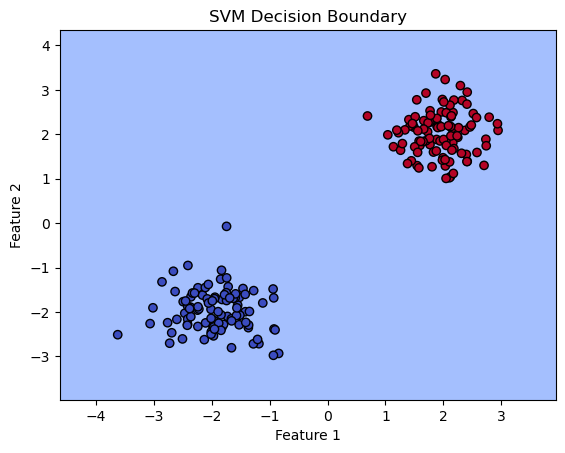

In [8]:
#Print Accuracy
predictions = svm.predict(X)
accuracy = np.mean(predictions == y)
print("Accuracy", accuracy)
plot_decision_boundary(svm, X, y)

Accuracy 0.835


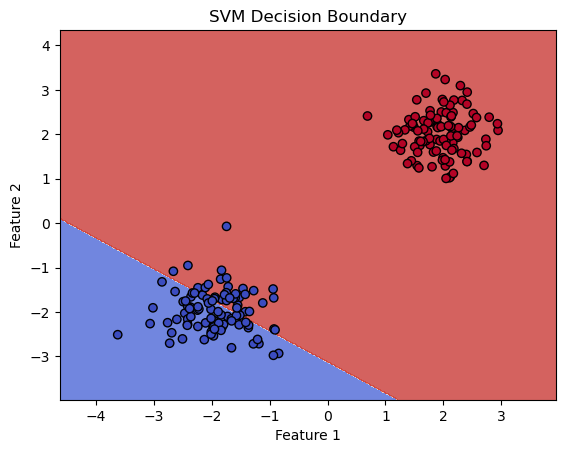

In [9]:
svm = SVM(C=1, kernel='poly')
svm.fit(X, y)

#Print Accuracy
predictions = svm.predict(X)
accuracy = np.mean(predictions == y)
print("Accuracy", accuracy)

plot_decision_boundary(svm, X, y)

Accuracy 0.5


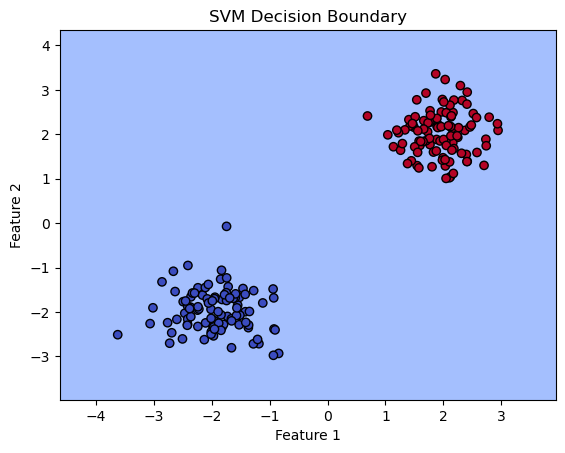

In [10]:
svm = SVM(C=1, kernel='rbf')
svm.fit(X, y)

#Print Accuracy
predictions = svm.predict(X)
accuracy = np.mean(predictions == y)
print("Accuracy", accuracy)

plot_decision_boundary(svm, X, y)

## using Sklearn

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
#Load th IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [14]:
#Split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [15]:
#Standardizing data by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Accuracy: 90.00%


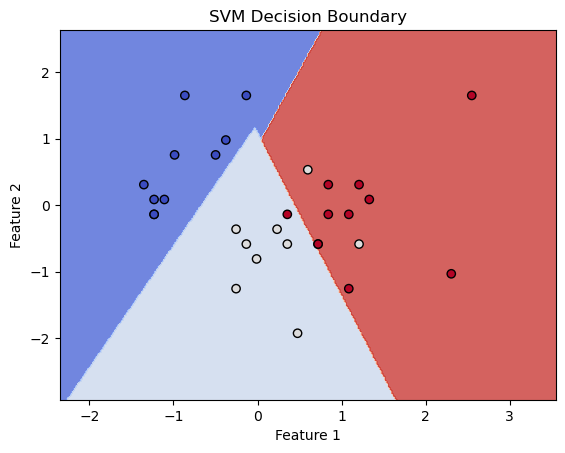

In [22]:
#SVM with linear kernel
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
#Predictions
y_pred = svm_classifier.predict(X_test)

#Calculate and Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plot_decision_boundary(svm_classifier, X_test, y_test)

Accuracy: 66.67%


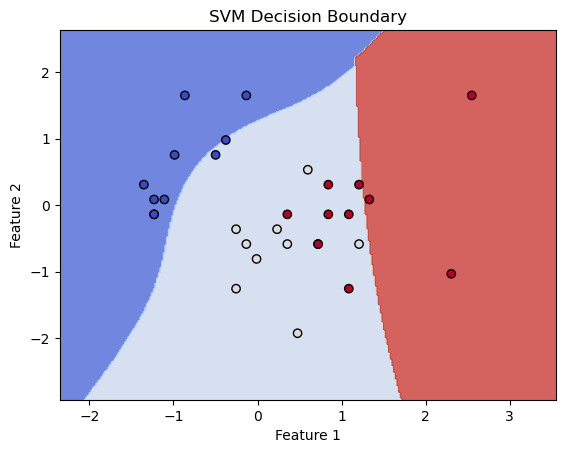

In [23]:
#SVM with linear kernel
svm_classifier = SVC(kernel='poly', C=1)
svm_classifier.fit(X_train, y_train)
#Predictions
y_pred = svm_classifier.predict(X_test)

#Calculate and Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plot_decision_boundary(svm_classifier, X_test, y_test)

Accuracy: 83.33%


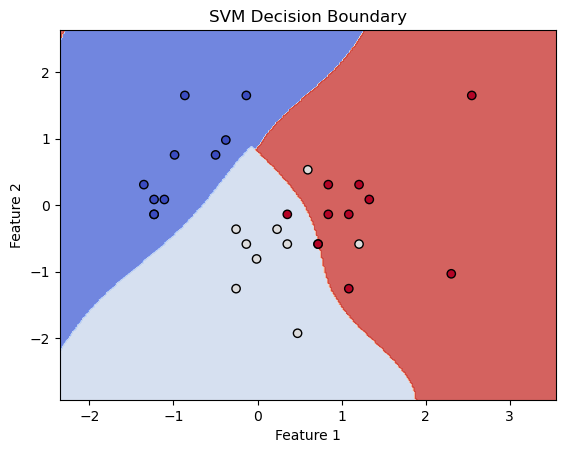

In [24]:
#SVM with linear kernel
svm_classifier = SVC(kernel='rbf', C=1)
svm_classifier.fit(X_train, y_train)
#Predictions
y_pred = svm_classifier.predict(X_test)

#Calculate and Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plot_decision_boundary(svm_classifier, X_test, y_test)

# Hard Margin vs Soft Margin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
#Load th IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

outlier_index = np.argmax(X, axis=0)
X[outlier_index] = [7.5, 4.0]

In [3]:
#Split the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
#Standardizing data by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [8]:
#create a hard margin SVM classifier
svm_har_margin = SVC(kernel='linear', C = 1e10)
svm_har_margin.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [9]:
#create a hard margin SVM classifier
svm_soft_margin = SVC(kernel='linear', C = 1)
svm_soft_margin.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [10]:
#Predictions
y_pred_hard = svm_har_margin.predict(X_test)
y_pred_soft = svm_soft_margin.predict(X_test)

In [11]:
#Accuracy
accuracy_hard_margin = accuracy_score(y_test, y_pred_hard)
accuracy_soft_margin = accuracy_score(y_test, y_pred_soft)

print("Accuracy Hard Margin", accuracy_hard_margin)
print("Accuracy Soft Margin", accuracy_soft_margin)

Accuracy Hard Margin 0.8666666666666667
Accuracy Soft Margin 0.9


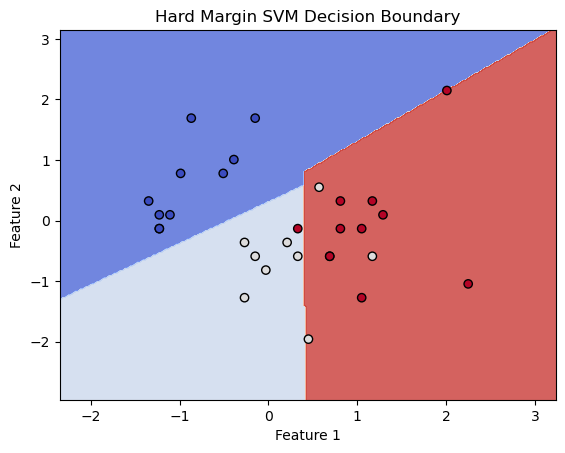

In [12]:
plot_decision_boundary(svm_har_margin, X_test, y_test, title="Hard Margin SVM Decision Boundary")

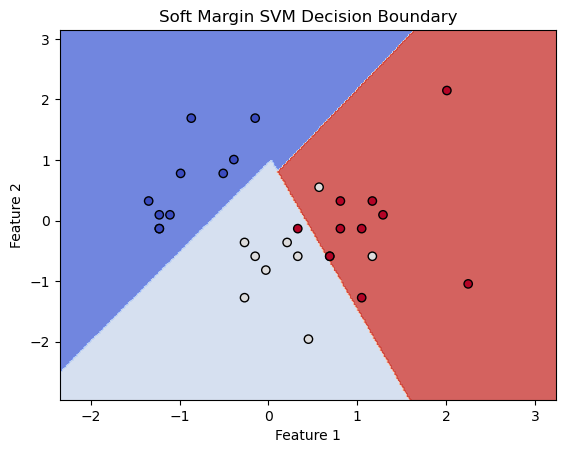

In [14]:
plot_decision_boundary(svm_soft_margin, X_test, y_test, title="Soft Margin SVM Decision Boundary")